#### Analysing the first lot of simulation that were run on AWS (01/03/2021).

#### TODO:

- ~~Prevent zero probabilites: if optimsation fails, use smart guess.~~
- ~~Add data collector method for project start times and offsets.~~
- Run diagnostic simulations x 2 without budgetary constraint (test no nulls w/o budget, test no zero probs after above change,test offset distributions - as expected?) - still gettings NULL and zero probs. Looking in mesa server sims: random team allocation is producing null teams because select_Team is returning teams that exceed budget. Basin is also producing teams that exceed budget!! Shit...
- (Do niter=0 in parallel)
- Make smart_guess respect budget constraints
- Confirm that smart_step is respecting budget constraint
- Write unit tests for optimiser (e.g. confirm all constraints are respected)
- Add data collector method for budgets: plot distribution of budgets (relative).
- Add any further data collectors required for testing hypotheses (e.g. save network)
- Run simulations x 3 (with budgetary constraint)

Questions:
- Is the budget shown in the scatter plot the 'flexed' budget?
- Is budget copied across (incuding flex) when using predefined projects?
- Does a 1000 worker simulation take 56 hours on my new computer?!

In [1]:
#DATA_DIR = '../simulation_io/single_runs_010321/'
DATA_DIR = '../simulation_io/diagnostics_020321/'

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open(DATA_DIR + 'random_all_in/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    random = pickle.load(ifile)
    
with open(DATA_DIR + 'basin_w_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
    basin_w_flex = pickle.load(ifile)
    
# with open(DATA_DIR + 'basin_wo_timeline_flex/tracked_projects_wc_100_np_2_ts_100.pickle', 'rb') as ifile:
#     basin_wo_flex = pickle.load(ifile)    

In [4]:
random

,project_id,prob,risk,budget,null,success
0,2,0.000000,10,32.0,True,False
1,5,0.000000,5,31.0,True,False
2,6,0.000000,10,12.0,True,False
3,4,0.000000,5,85.0,False,False
4,3,0.000000,25,39.0,False,False
...,...,...,...,...,...,...
186,190,0.000000,25,14.0,True,False
187,180,0.043839,5,27.5,False,False
188,185,0.000000,25,33.0,False,False
189,184,0.000000,10,88.0,False,False


In [6]:
print("Fraction of null projects.")
print("Random: ", np.round(sum(random.null) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.null) / len(basin_w_flex), 2))
#print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.null) / len(basin_wo_flex), 2))

Fraction of null projects.
Random:  0.16
Basin with timeline flex:  0.57


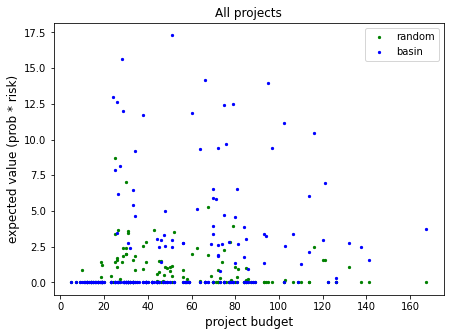

In [8]:
fs = 12
ps = 5
plt.figure(figsize=(7,5))
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

# plt.scatter(basin_wo_flex.budget,
#             basin_wo_flex.prob * basin_wo_flex.risk,
#             label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("All projects")
plt.legend();

In [10]:
random = random.loc[~random.null]
basin_w_flex = basin_w_flex.loc[~basin_w_flex.null]
#basin_wo_flex = basin_wo_flex.loc[~basin_wo_flex.null]

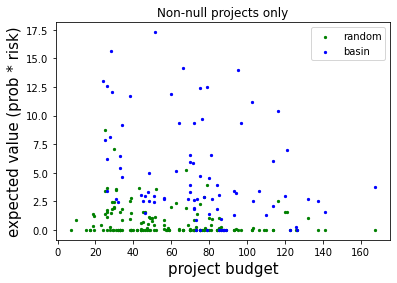

In [11]:
fs = 15
ps = 5
plt.scatter(random.budget,
            random.prob * random.risk,
            label='random', color='green', s=ps)

plt.scatter(basin_w_flex.budget,
            basin_w_flex.prob * basin_w_flex.risk,
            label='basin', color='blue', s=ps)

# plt.scatter(basin_wo_flex.budget,
#             basin_wo_flex.prob * basin_wo_flex.risk,
#             label='basin (no flex)', color='red', s=ps)

plt.xlabel("project budget", fontsize=fs)
plt.ylabel("expected value (prob * risk)", fontsize=fs)
plt.title("Non-null projects only")
plt.legend();

In [12]:
print("Mean probability of success.")
print("Random: ", np.round(np.mean(random.prob), 2))
print("Basin with timeline flex: ", np.round(np.mean(basin_w_flex.prob), 2))
#print("Basin without timeline flex: ", np.round(np.mean(basin_wo_flex.prob), 2))

Mean probability of success.
Random:  0.07
Basin with timeline flex:  0.41


In [13]:
print("Fraction of successful projects.")
print("Random: ", np.round(sum(random.success) / len(random), 2))
print("Basin with timeline flex: ", np.round(sum(basin_w_flex.success) / len(basin_w_flex), 2))
#print("Basin without timeline flex: ", np.round(sum(basin_wo_flex.success) / len(basin_wo_flex), 2))

Fraction of successful projects.
Random:  0.04
Basin with timeline flex:  0.42


(array([12.,  2.,  4.,  5., 11., 10., 21., 12.,  7.,  1.]),
 array([0.        , 0.08147477, 0.16294954, 0.24442431, 0.32589908,
        0.40737385, 0.48884862, 0.57032339, 0.65179816, 0.73327293,
        0.8147477 ]),
 <BarContainer object of 10 artists>)

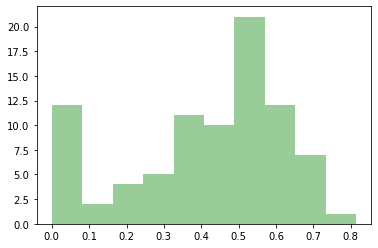

In [18]:
#plt.hist(random.prob, alpha=0.4, color='blue')
plt.hist(basin_w_flex.prob, alpha=0.4, color='green')
#plt.hist(basin_wo_flex.prob, alpha=0.4, color='red');

In [15]:
import random

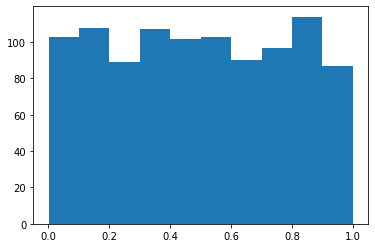

In [16]:
plt.hist([random.uniform(0.0, 1.0) for r in range(1000)]);